## ДЗ к Уроку 2 "Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск"

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.


In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [5]:
coef

array([62.6735955, 68.0472182])

Отмасштабируем получившиеся признаки методом стандартизации.

In [6]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [7]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Подготовка данных и средств проверки закончена. Далее реализуем градиентный спуск.

При этом выражение градиента в матричной форме выглядит так:

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

Если расписать $j$-ю компонетну этого градиента, то получим

$$\frac{\partial Q}{\partial w_{j}} = \frac{2}{l}\sum^{l}_{i=1}x^{j}_{i}(\left \langle w,x_{i} \right \rangle - y_{i}),$$

In [19]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
           
    new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 38.5683


Реализуем стохастический градиентный спуск.

In [20]:
# инициализируем начальный вектор весов
w_s = np.zeros(2)

# список векторов весов после каждой итерации
w_list_s = [w.copy()]

# список значений ошибок после каждой итерации
errors_s = []

# шаг градиентного спуска
eta_s = 0.01

# максимальное число итераций
max_iter_s = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist_s = 1e-8

# зададим начальную разницу весов большим числом
weight_dist_s = np.inf

# счетчик итераций
iter_num_s = 0

np.random.seed(135)

# ход градиентного спуска
while weight_dist_s > min_weight_dist_s and iter_num_s < max_iter_s:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w_s = w_s - 2 * eta_s * np.dot(data[train_ind].T, (np.dot(data[train_ind], w_s) - target[train_ind])) / target.shape[0]

    weight_dist_s = np.linalg.norm(new_w_s - w_s, ord=2)
    
    w_list_s.append(new_w_s.copy())
    errors_s.append(mserror(data, new_w_s, target))
    
    iter_num_s += 1
    w_s = new_w_s
    
w_list_s = np.array(w_list_s)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_s[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 200.1735


Text(0, 0.5, 'MSE')

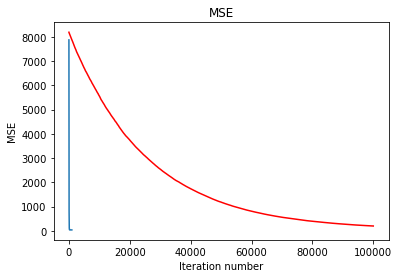

In [21]:
# Визуализируем изменение функционалов ошибки
plt.plot(range(len(errors)), errors)
plt.plot(range(len(errors_s)), errors_s, 'r')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

__Вывод:__
Скорость падения для градиентного спуска гораздо больше, чем для стохастического градинтного спуска.

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

Метод регуляризации заключается в "штрафовании" модели за слишком большие веса путем добавления нового члена к среднеквадратичной ошибке:

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

добавленный член $\lambda ||w||^{2}$ - _квадратичный регуляризатор_ , который представляет собой $L_{2}$-норму вектора весов, то есть сумму квадратов весов $\sum^{d}_{j=1}w_{j}^{2}$, коэффицент $\lambda$ при нем - коэффициент регуляризации.

In [51]:
# реализуем функцию, определяющую среднеквадратичную ошибку c L2 квадратичным регуляризатором
def mserror_L2(X, w, y_pred, l2):
    y = X.dot(w)+l2*np.sum([w**2 for w in w])
    return (sum((y - y_pred)**2)) / len(y)

In [52]:
# зададим коэффициент регуляризации
l2 = 1

# инициализируем начальный вектор весов
w_s = np.zeros(2)

# список векторов весов после каждой итерации
w_list_s = [w.copy()]

# список значений ошибок после каждой итерации
errors_s = []

# шаг градиентного спуска
eta_s = 0.01

# максимальное число итераций
max_iter_s = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist_s = 1e-8

# зададим начальную разницу весов большим числом
weight_dist_s = np.inf

# счетчик итераций
iter_num_s = 0

np.random.seed(145)

# ход градиентного спуска
while weight_dist_s > min_weight_dist_s and iter_num_s < max_iter_s:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w_s = w_s - 2 * eta_s * np.dot(data[train_ind].T, (np.dot(data[train_ind], w_s) - target[train_ind])) / target.shape[0]

    weight_dist_s = np.linalg.norm(new_w_s - w_s, ord=2)
    
    w_list_s.append(new_w_s.copy())
    errors_s.append(mserror_L2(data, new_w_s, target, l2))
    
    iter_num_s += 1
    w_s = new_w_s
    
w_list_s = np.array(w_list_s)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_s[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 7914.4937


Text(0, 0.5, 'MSE')

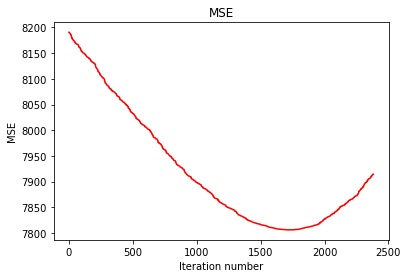

In [53]:
# Визуализируем изменение функционалов ошибки
plt.plot(range(len(errors_s)), errors_s, 'r')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

3. [опция] Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию

Описанный выше метод с использованием $L_{2}$-нормы вектора весов в качестве регуляризатора называется _$L_{2}$-регуляризацией_. По аналогии существует также _$L_{1}$-регуляризация_ , использующая в качестве регуляризатора $L_{1}$-норму вектора весов, то есть сумму модулей весов.

$$||w||_{1} = \sum^{d}_{j=1}|w_{j}|.$$

In [48]:
# реализуем функцию, определяющую среднеквадратичную ошибку c L1  регуляризатором
def mserror_L1(X, w, y_pred, l1):
    y = X.dot(w)+l1*np.sum(np.absolute(w))
    return (sum((y - y_pred)**2)) / len(y)

In [49]:
# зададим коэффициент регуляризации
l1 = 1

# инициализируем начальный вектор весов
w_s = np.zeros(2)

# список векторов весов после каждой итерации
w_list_s = [w.copy()]

# список значений ошибок после каждой итерации
errors_s = []

# шаг градиентного спуска
eta_s = 0.01

# максимальное число итераций
max_iter_s = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist_s = 1e-8

# зададим начальную разницу весов большим числом
weight_dist_s = np.inf

# счетчик итераций
iter_num_s = 0

np.random.seed(135)

# ход градиентного спуска
while weight_dist_s > min_weight_dist_s and iter_num_s < max_iter_s:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w_s = w_s - 2 * eta_s * np.dot(data[train_ind].T, (np.dot(data[train_ind], w_s) - target[train_ind])) / target.shape[0]

    weight_dist_s = np.linalg.norm(new_w_s - w_s, ord=2)
    
    w_list_s.append(new_w_s.copy())
    errors_s.append(mserror_L1(data, new_w_s, target, l1))
    
    iter_num_s += 1
    w_s = new_w_s
    
w_list_s = np.array(w_list_s)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_s[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 13277.8844


Text(0, 0.5, 'MSE')

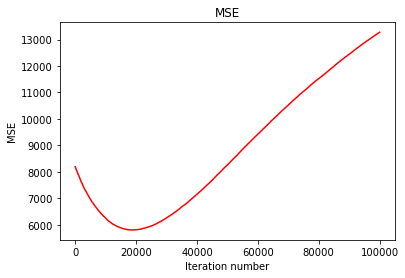

In [50]:
# Визуализируем изменение функционалов ошибки
plt.plot(range(len(errors_s)), errors_s, 'r')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')